In [17]:
%%capture
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install seaborn

### task1

**Формулировка:** Выбрать один из датасетов из перечня:
- Iris
- Palmer Archipelago (Antarctica) penguin
- Wine Quality
- Любой другой датасет, в котором есть три класса и четыре количественных
(недискретных) признака.

Для выполнения «Лабораторной работы №1» мной был выбран ***The Iris Dataset***


In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

### task2

**Формулировка:**  Вывести в табличной форме статистику по датасету, включая
- Размерность всего датасета
- Количество признаков
- Количество целевых классов и объектов в каждом из классов
- Процент объектов с неопределенными признаками
- Иные ключевые характеристики датасета

Выбрать три класса и четыре количественных (недискретных) признака.
Сформировать на их основе «отфильтрованный» датасет для дальнейшего анализа, удалив
из датасета все объекты, для которых не определены значения хотя бы одного из
выбранных четырех количественных признаков.

In [2]:
import pandas as pd # task2

In [3]:
stats = {}

In [4]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [5]:
stats["Number of features"] = len(iris.feature_names)
stats["Number of target classes"] = len(iris.target_names)

In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['iris_name'] = df['target'].apply(lambda x: iris.target_names[x])
stats["Number of object in each class"] = dict(df['iris_name'].value_counts())
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
stats['Dataset dimensionality'] = f"{df.shape[0]} * {df.shape[1]}"
stats['% of missing values'] = f"{(df.isna().sum().sum() / df.size * 100):.2f}%"

In [10]:
stat_table = pd.DataFrame({
    'Parameter': [
        'Dataset dimensionality',
        'Number of features', 
        'Number of target classes',
        'Number of object in each class',
        '% of missing values',
    ],
    'Meaning': [
        stats['Dataset dimensionality'],
        stats['Number of features'],
        stats['Number of target classes'],
        stats['Number of object in each class'],
        stats['% of missing values'],
    ]
})
stat_table

,Parameter,Meaning
0,Dataset dimensionality,150 * 6
1,Number of features,4
2,Number of target classes,3
3,Number of object in each class,"{'setosa': 50, 'versicolor': 50, 'virginica': 50}"
4,% of missing values,0.00%


In [11]:
df_total = df.copy()
df_total = df_total.drop('iris_name', axis=1) #Удаляем текстовый признак, оставляем только числовые и target
df_total.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### task3

**Формулировка:** Выполнить визуализацию датасета по всем парам выбранных количественных
переменных, обозначая:
- в графиках с разными парами переменных объекты из разных классов различными по
форме и цвету точками,
- в графиках с одной и той же парой переменных – гистограммы с достаточным числом
разбиений (обычно – не менее 20), либо плотности распределения переменной по оси
признака.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

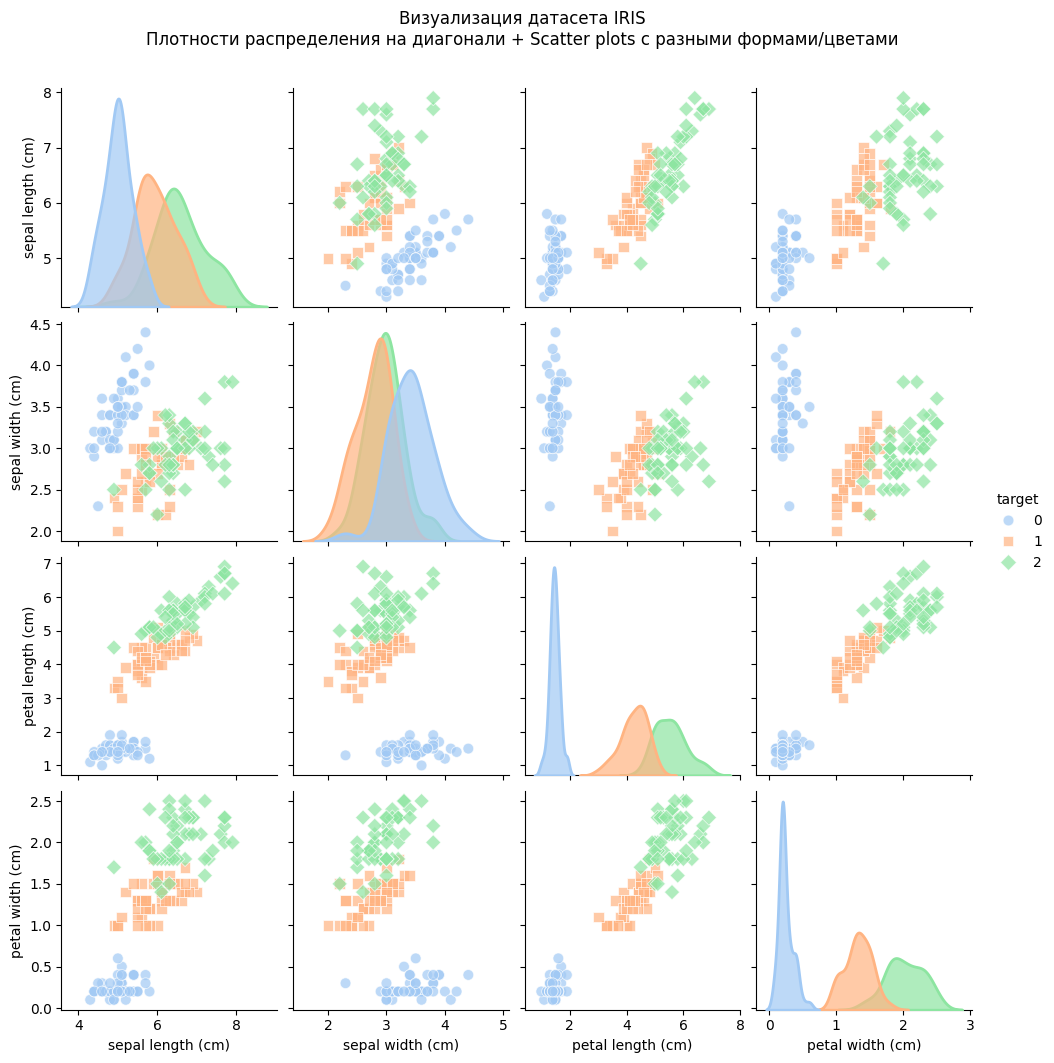

In [13]:
sns.pairplot(df_total,
                 hue='target',
                 palette='pastel',
                 diag_kind='kde',
                 diag_kws={'alpha': 0.7,
                      'linewidth': 2},
                 markers=['o', 's', 'D'],   
                 plot_kws={'alpha': 0.7,'s': 60})

plt.suptitle('Визуализация датасета IRIS\n'
             'Плотности распределения на диагонали + '
             'Scatter plots с разными формами/цветами', 
             y=1.06)
plt.show()                 

### task3*

In [22]:
df_with_num = df_total.copy()
df_with_num['number'] = df.index
df_with_num

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,number
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,3
4,5.0,3.6,1.4,0.2,0,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,145
146,6.3,2.5,5.0,1.9,2,146
147,6.5,3.0,5.2,2.0,2,147
148,6.2,3.4,5.4,2.3,2,148


Text(0.5, 1.06, 'Визуализация датасета IRIS\nПлотности распределения на диагонали + Scatter plots с разными формами/цветами')

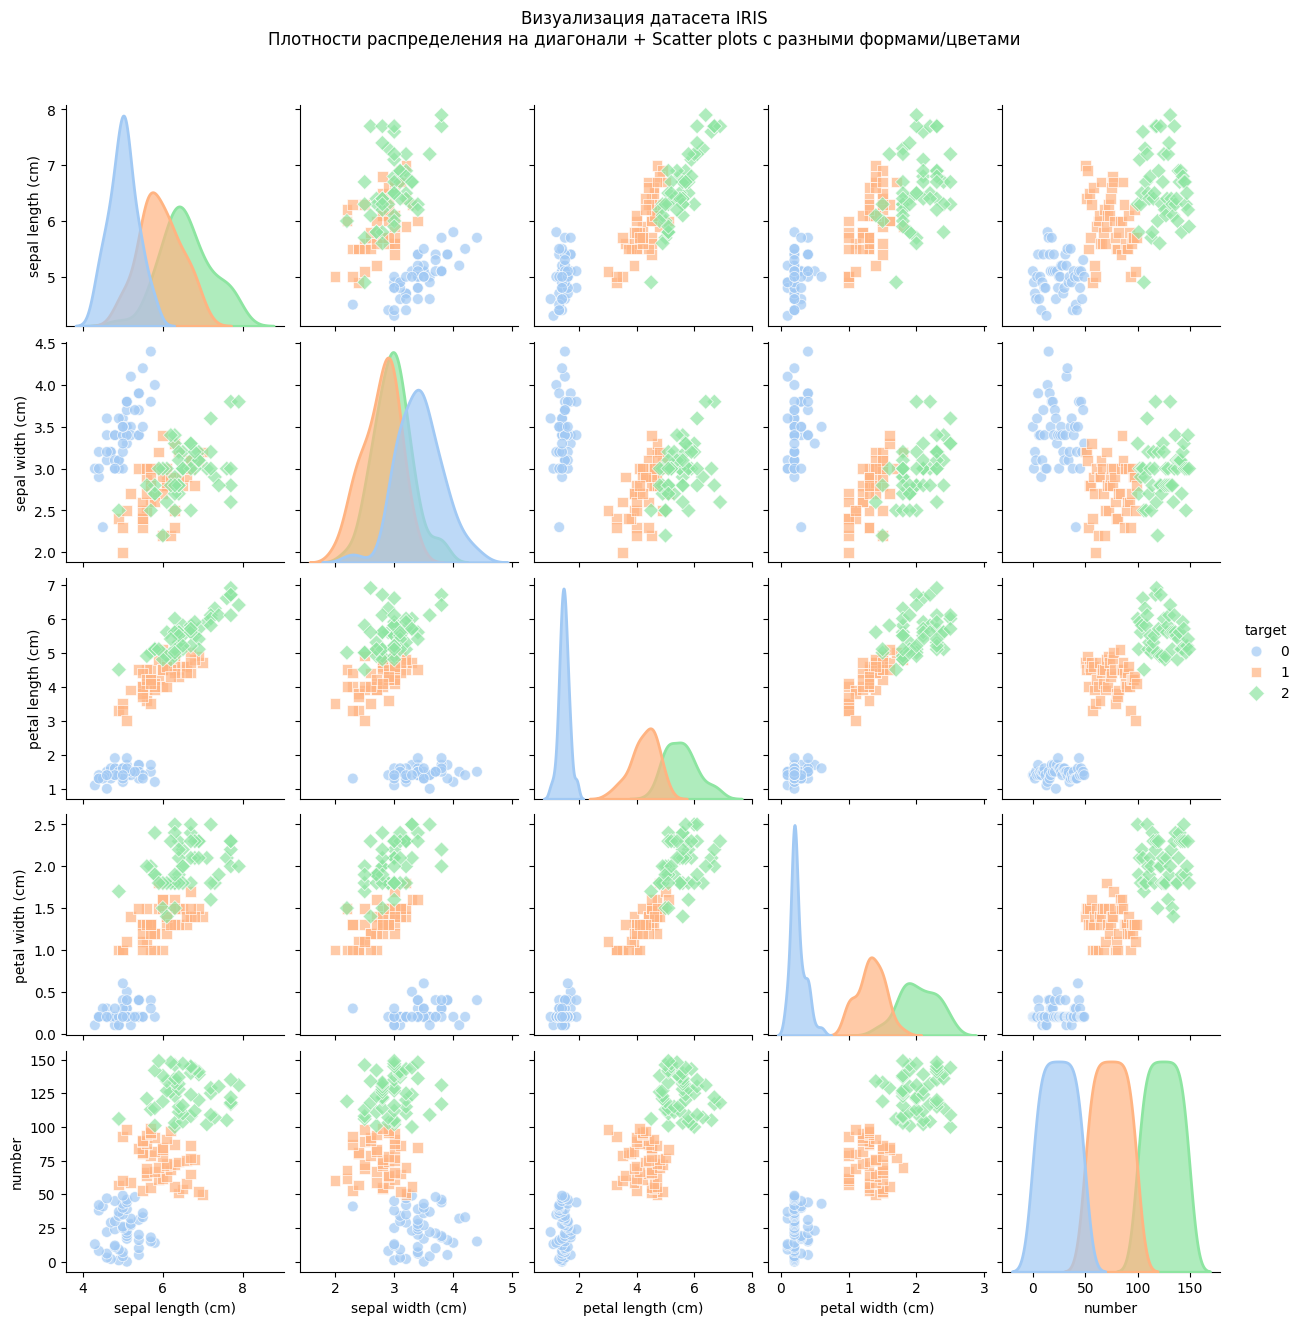

In [23]:
sns.pairplot(df_with_num,
                 hue='target',
                 palette='pastel',
                 diag_kind='kde',
                 diag_kws={'alpha': 0.7,insert(0, 'number', [i for i in range(df_with_num.shape[0])])
                      'linewidth': 2},
                 markers=['o', 's', 'D'],   
                 plot_kws={'alpha': 0.7,'s': 60})

plt.suptitle('Визуализация датасета IRIS\n'
             'Плотности распределения на диагонали + '
             'Scatter plots с разными формами/цветами', 
             y=1.06)

### task4

**Формулировка:**

- В табличном варианте оценить степень сопряженности пар признак-признак на всем датасете, используя коэффициенты корреляции Пирсона и Спирмана, с p-критериями для коэффициентов. 
- В табличном варианте также оценить степень сопряженности пар признак признак в каждом отдельном классе, используя коэффициенты корреляции Пирсона и Спирмана, с p-критериями для коэффициентов. 

Таблицы корреляций также отобразить как тепловые карты.

In [14]:
import numpy as np
from scipy import stats

In [15]:
def correlation_with_pvalues(df, method='person'):
    """
    Calculates p-values using the t-distribution.
    For more information, see https://sky.pro/wiki/analytics/kak-poschitat-p-v-statistike-podrobnyj-gajd-dlya-nachinayushchih/
    
    The Pearson/Spearman correlation coefficient and p-value calculation are described in:
    Makarov, A. A., Tambovtseva, A. A., Vasilenok, N. A., "Correlation Coefficients." 
    Mathematics and Statistics, Part 2, Political Science Program, 2019-20 (May 28, 2020).
    https://allatambov.github.io/psms/pdf/associations.pdf
    
    Attentively :
        df - pd.DatFrame should contain only quantitative characteristics
    """
    
    corr_matrix = df.corr(method=method)
    numb_observations = len(df)
    
    p_values_mtrx = pd.DataFrame(np.zeros((df.shape[1],df.shape[1])), 
                            index = corr_matrix.index,
                            columns=corr_matrix.columns)
    
    for i in range(df.shape[1]):
        for j in range(df.shape[1]):
            if i==j:
                p_values_mtrx.iloc[i,j] = 0.0
            else:
                R = corr_matrix.iloc[i,j]
                if abs(R) == 1:
                    pvalue_matrix.iloc[i, j] = 0.0
                    
                if method=='spearman':
                    t = R * np.sqrt((numb_observations - 2)/(1 - R**2))
                    p_values_mtrx.iloc[i,j] = stats.t.sf(abs(t), df=numb_observations-2) * 2  
                else:
                    z = R*np.sqrt(numb_observations - 1)
                    p_values_mtrx.iloc[i,j] = stats.norm.sf(abs(z)) * 2 
    
    return corr_matrix, p_values_mtrx

In [16]:
corr_pearson_all, pvals_pearson_all = correlation_with_pvalues(df_total.drop('target', axis=1), 'pearson')
corr_spearman_all, pvals_spearman_all = correlation_with_pvalues(df_total.drop('target', axis=1), 'spearman')

In [17]:
results_by_class = {}

class_idx = df_total['target'].unique()

for idx in class_idx:
    class_data = df_total[df_total['target'] == idx]
    corr_pearson, pvals_pearson = correlation_with_pvalues(class_data, 'pearson')
    corr_spearman, pvals_spearman = correlation_with_pvalues(class_data, 'spearman')
    
    results_by_class[idx] = {
        'pearson_corr': corr_pearson,
        'pearson_pvals': pvals_pearson,
        'spearman_corr': corr_spearman, 
        'spearman_pvals': pvals_spearman
    }

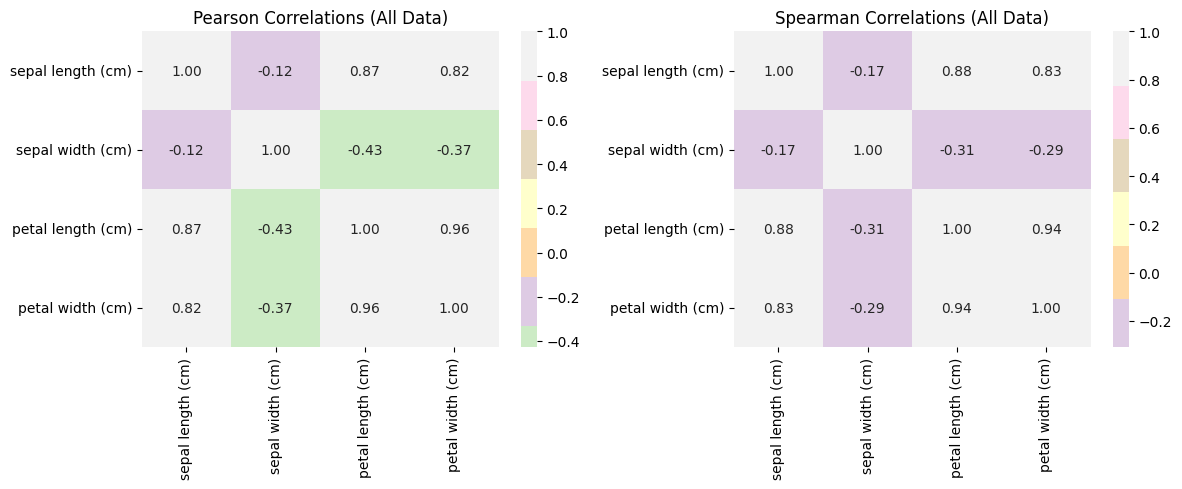

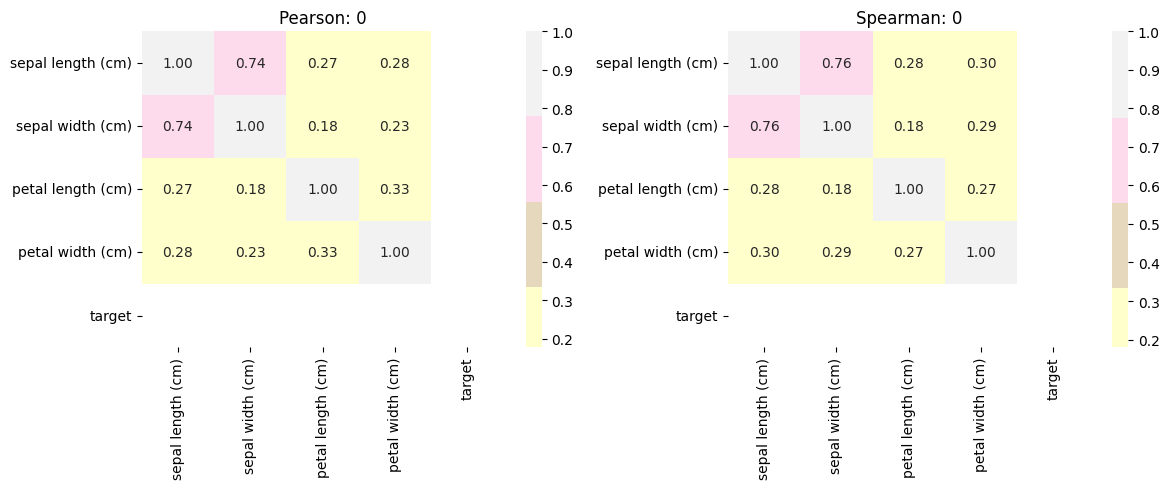

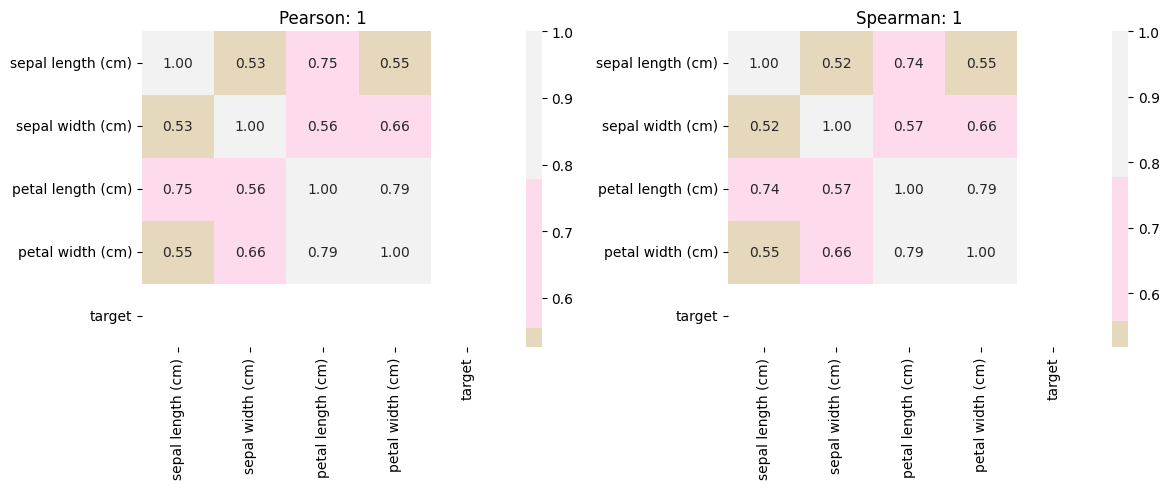

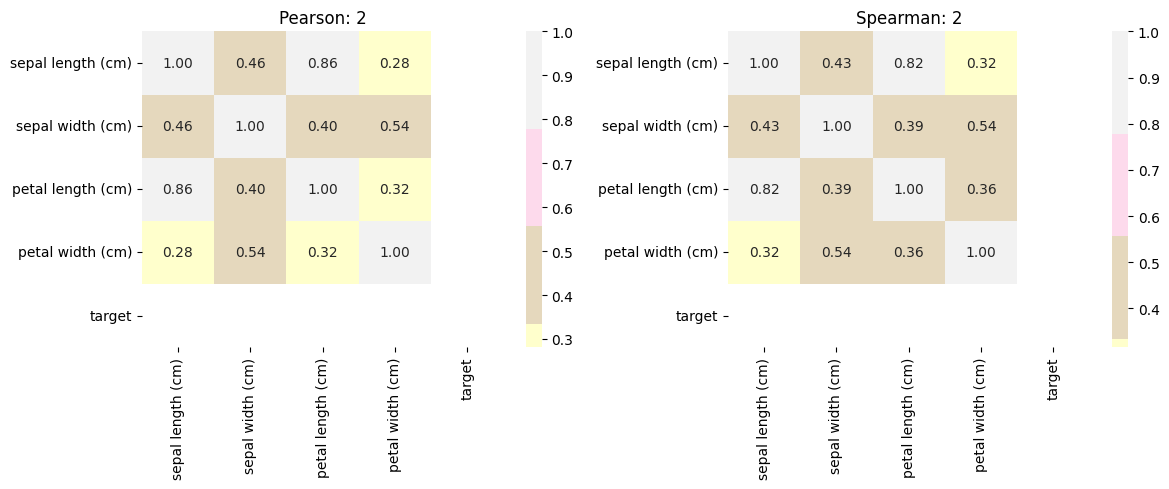

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(corr_pearson_all, annot=True, ax=axes[0], cmap='Pastel1', center=0, fmt='.2f')
axes[0].set_title('Pearson Correlations (All Data)')

sns.heatmap(corr_spearman_all, annot=True, ax=axes[1], cmap='Pastel1', center=0, fmt='.2f')
axes[1].set_title('Spearman Correlations (All Data)')

plt.tight_layout()



for class_idx, results in results_by_class.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.heatmap(results['pearson_corr'], annot=True, ax=axes[0], cmap='Pastel1', center=0, fmt='.2f')
    axes[0].set_title(f'Pearson: {class_idx}')
    
    sns.heatmap(results['spearman_corr'], annot=True, ax=axes[1], cmap='Pastel1', center=0, fmt='.2f')
    axes[1].set_title(f'Spearman: {class_idx}')
    
    plt.tight_layout()
    
plt.show()

In [19]:
pvals_pearson_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.000000e+00,1.512523e-01,1.918283e-26,1.786580e-23
sepal width (cm),1.512523e-01,0.000000e+00,1.697138e-07,7.853598e-06
petal length (cm),1.918283e-26,1.697138e-07,0.000000e+00,6.793760e-32
petal width (cm),1.786580e-23,7.853598e-06,6.793760e-32,0.000000e+00


In [20]:
pvals_spearman_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.000000e+00,0.041368,3.443087e-50,4.189447e-40
sepal width (cm),4.136799e-02,0.000000,1.153938e-04,3.342981e-04
petal length (cm),3.443087e-50,0.000115,0.000000e+00,8.156597e-70
petal width (cm),4.189447e-40,0.000334,8.156597e-70,0.000000e+00


### task5-task6

**Формулировка:** 
- [5] Отдельно повторно выполнить пункт [3]; на каждом из графиков для каждого из классов
отобразить линию линейной регрессии с соответствующими прогнозными интервалами
регрессий (95% predictive bands).
- [6] Повторить пункт [5], но с доверительными интервалами регрессий (95% confidence
bands)


##### Матричная форма линейной регрессии
*Материал подготовлен на основе: "Python Задание 6: линейная регрессия" Тарасенко А.С. НГУ, "Теория Вероятности и Математическая статистика" НГУ, ИИР, II курс, осенний семестр*

$$
y = X \beta + \varepsilon
$$

где:
$$
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix},
\quad
X = \begin{bmatrix} 
1 & x_{11} & \cdots & x_{1k} \\
1 & x_{21} & \cdots & x_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & \cdots & x_{nk}
\end{bmatrix},
\quad
\beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix},
\quad
\varepsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix}
$$

Оценка параметров:
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$
*где “крышечка” подчеркивает что это оценка, а не реальные β.*

После того, как мы нашли приближённые коэффициенты βˆ, мы можем
получить предсказания ˆy по x–ам из нашей выборки:


$$\hat{y}_{i}=\hat{\beta}_{0}+\hat{\beta}_{1} x_{i 1}+\hat{\beta}_{2} x_{i 2}+\cdots+\hat{\beta}_{k} x_{i k}$$

Эти yˆ-и содержат приближение линейной части нашей модели, зависящей от x-ов, но они не включают в себя отклонения от прочих факторов, представленные ошибками :
$$\tilde{\varepsilon}_{i}=y_{i}-\hat{y}_{i}$$


In [21]:
def simple_linear_regression(X, y):
    """
    Вычисляет параметры одномерной линейной регрессии y = β₀ + β₁X
    Возвращает только коэффициенты и предсказания
    """
    n = len(y)
    X_with_int = np.column_stack([np.ones(n), X]) 
    
    beta = np.linalg.inv(X_with_int.T @ X_with_int) @ X_with_int.T @ y
    y_pred = X_with_int @ beta
    residuals = y - y_pred
    
    return {
        'intercept': beta[0],
        'slope': beta[1],
        'y_pred': y_pred,
        'residuals': residuals,
    }

In [22]:
def compute_prod_bands(X, y, y_pred) -> tuple[np.ndarray, np.ndarray]:
    X = np.array(X).flatten()
    y_pred = np.array(y_pred).flatten()
    
    n = len(X)
    
    residuals = y - y_pred
    SSR = np.sum(residuals**2)  
    df_resid = n - 2  # степени свободы
    
    MSE = SSR / df_resid 
    
    mean_x = np.mean(X)
    sum_of_squares_x = np.sum((X - mean_x)**2)
    
    # Стандартная ошибка прогноза для индивидуального наблюдения
    se_pred = np.sqrt(MSE * (1 + 1/n + (X - mean_x)**2 / sum_of_squares_x))
    
    alpha = 0.05
    t_val = stats.t.ppf(1 - alpha/2, df_resid)
    
    pred_upper = y_pred + t_val * se_pred
    pred_lower = y_pred - t_val * se_pred
    
    return pred_lower, pred_upper

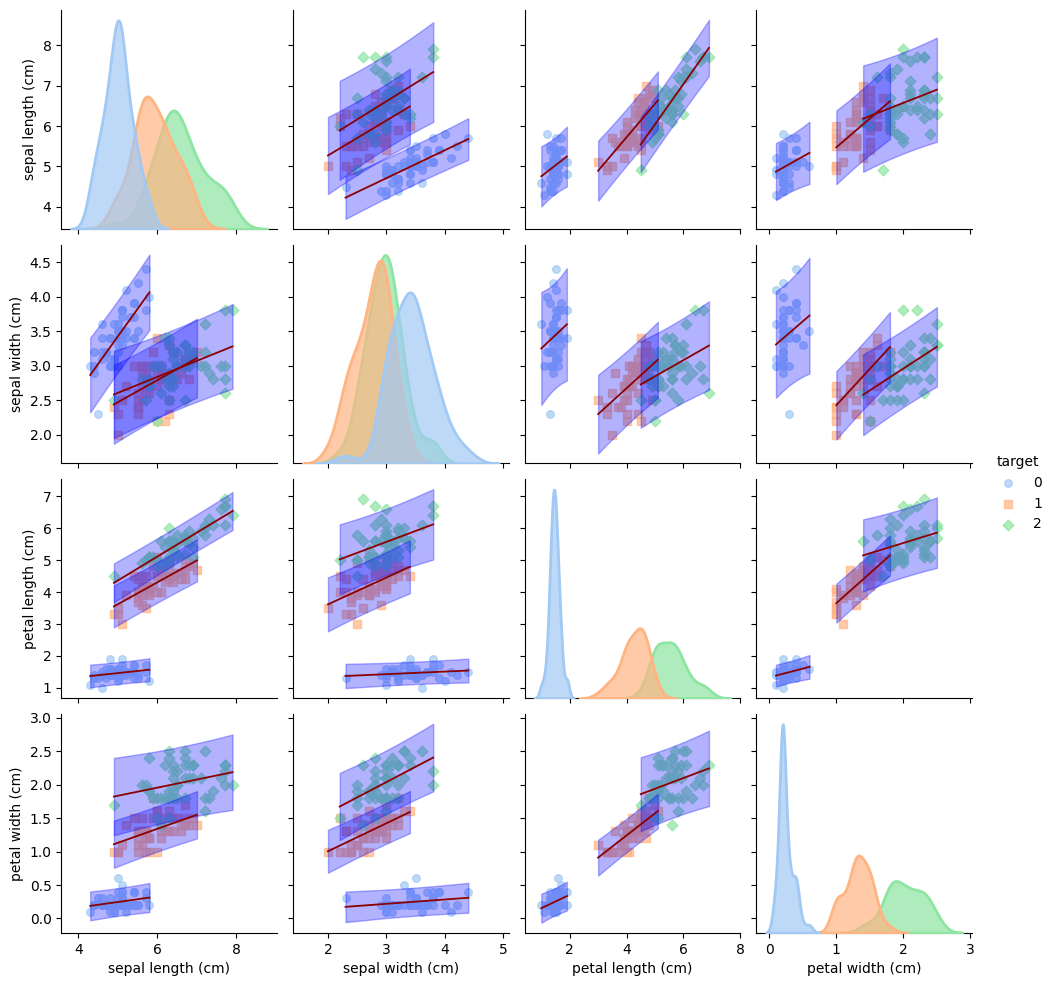

In [23]:
reg_fig = sns.pairplot(df_total,
             hue='target',
             palette='pastel',
             kind='reg',
             diag_kind='kde',
             markers=['o', 's', 'D'],
             diag_kws={'alpha': 0.7, 'linewidth': 2},
             plot_kws={
                 'scatter_kws': {'alpha': 0.7, 's': 30}, 
                 'line_kws': {'alpha': 1.0, 'linewidth': 1.3, 'color': 'darkred'},
                 'ci': None})


objects_by_class = dict()
for class_idx, class_name in enumerate(iris.target_names):
    objects_by_class[class_name] = df_total[df_total['target'] == class_idx]

feature_names = df_total.columns.to_list()[:-1]
n_features = len(feature_names)

for i in range(n_features):  
    for j in range(n_features):  
        if i != j:
            ax = reg_fig.axes[j, i]
            
            for class_name in iris.target_names:
                class_data = objects_by_class[class_name]
                x = class_data[feature_names[i]].to_numpy()
                y = class_data[feature_names[j]].to_numpy()
                
                solution = simple_linear_regression(x, y)
                pred_lower, pred_upper = compute_prod_bands(x, y, solution['y_pred'])
                    
                sort_idx = np.argsort(x)
                x_sorted = x[sort_idx]
                pred_lower_sorted = pred_lower[sort_idx]
                pred_upper_sorted = pred_upper[sort_idx]
                    
                ax.fill_between(x_sorted, pred_lower_sorted, pred_upper_sorted, 
                              color="b", alpha=0.3)

plt.show()

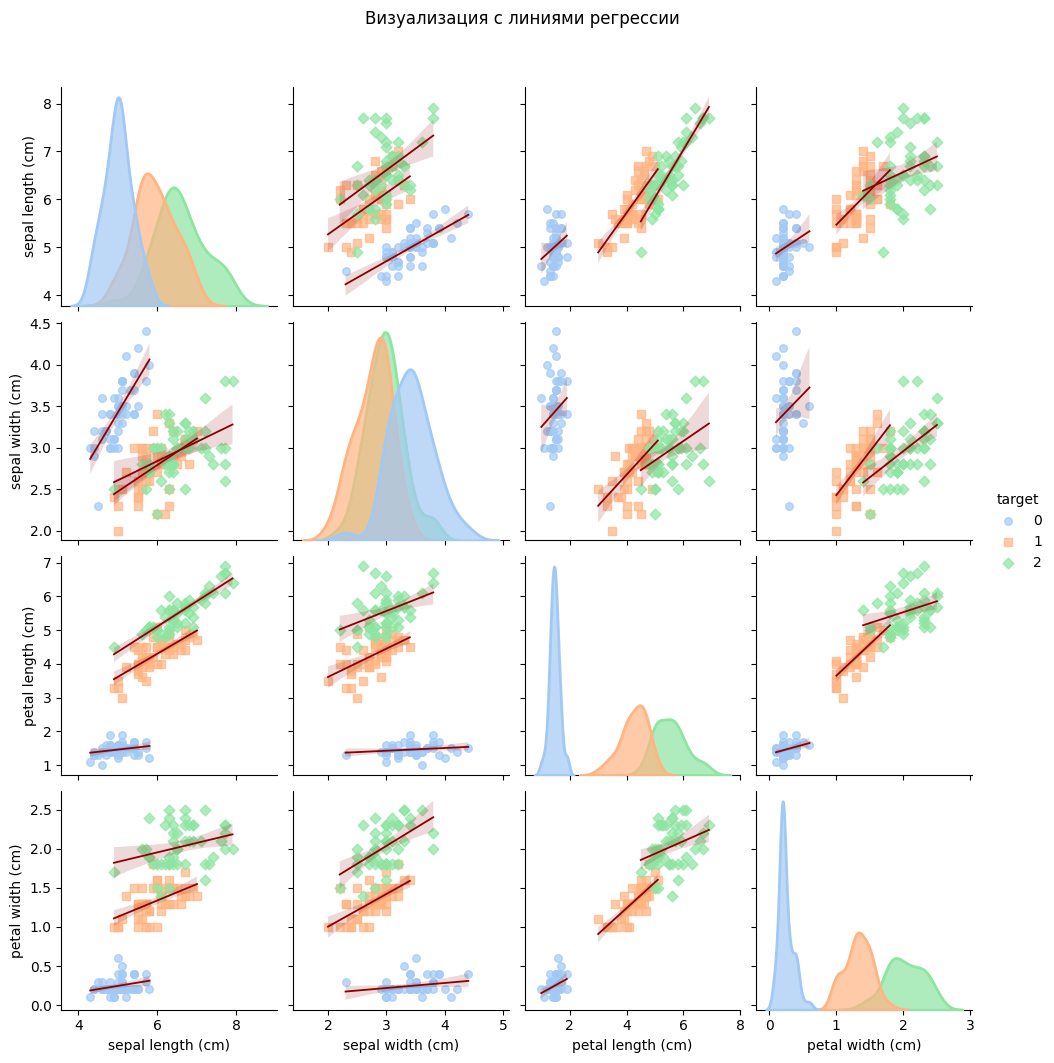

In [24]:
sns.pairplot(df_total,
             hue='target',
             palette='pastel',
             kind='reg',
             diag_kind='kde',
             markers=['o', 's', 'D'],
             diag_kws={'alpha': 0.7, 'linewidth': 2},
             plot_kws={
                 'scatter_kws': {'alpha': 0.7, 's': 30}, 
                 'line_kws': {'alpha': 1.0, 'linewidth': 1.3, 'color': 'darkred'},
                 'ci': 95})

plt.suptitle('Визуализация с линиями регрессии', y=1.06)
plt.show()

### task7

**Формулировка:** Вывести:
- формулы каждой линейной регрессии вместе со значениями критерия R2,
- критерий Вальда (F-критерий, его степени свободы и соответствующий p-критерий),
- критерий LR (хи-квадрат-критерий, степени свободы и соответствующий p-критерий),
- критерий score (хи-квадрат-критерий, степени свободы и соответствующий p-критерий).

In [25]:
def calculate_regression_statistics(X, y, x_name, y_name):
    """
    Вычисляет статистические критерии для одномерной линейной регрессии
    Для задания 7: 
        критерий R2,
        критерий Вальда (F-критерий, его степени свободы и соответствующий p-критерий),
        критерий LR (хи-квадрат-критерий, степени свободы и соответствующий p-критерий),
        критерий score (хи-квадрат-критерий, степени свободы и соответствующий p-критерий).
    """
    
    regression_result = simple_linear_regression(X, y)
    y_pred = regression_result['y_pred']
    residuals = regression_result['residuals']
    n = len(y)
    
    SST = np.sum((y - np.mean(y))**2)  # Total sum of squares
    SSE = np.sum((y_pred - np.mean(y))**2)  # Explained sum of squares  
    SSR = np.sum(residuals**2)  # Residual sum of squares
    
    r_squared = 1 - SSR / SST
    
    # Степени свободы
    df_model = 1  # Один предиктор
    df_resid = n - 2  # n - количество параметров
    
    MSR = SSE / df_model
    MSE = SSR / df_resid
    f_stat = MSR / MSE
    f_pvalue = 1 - stats.f.cdf(f_stat, df_model, df_resid)
    
    lr_stat = n * np.log(1 + (f_stat * df_model) / df_resid)
    lr_pvalue = 1 - stats.chi2.cdf(lr_stat, df_model)
    
    score_stat = f_stat * df_model
    score_pvalue = 1 - stats.chi2.cdf(score_stat, df_model)
    
    result = regression_result.copy()
    result.update({
        'formula': f"{y_name} = {regression_result['slope']:.6f}·{x_name} + {regression_result['intercept']:.6f}",
        'r_squared': r_squared,
        'f_stat': f_stat,
        'f_df_model': df_model,
        'f_df_resid': df_resid,
        'f_pvalue': f_pvalue,
        'lr_stat': lr_stat,
        'lr_df': df_model,
        'lr_pvalue': lr_pvalue,
        'score_stat': score_stat,
        'score_df': df_model,
        'score_pvalue': score_pvalue,
    })
    
    return result

In [26]:
print("=" * 80)
print("РЕЗУЛЬТАТЫ ЛИНЕЙНЫХ РЕГРЕССИЙ ДЛЯ ДАТАСЕТА IRIS")
print("=" * 80)
    
for class_idx, class_name in enumerate(iris.target_names):
    print(f"\n{'#' * 60}")
    print(f"КЛАСС: {class_name.upper()}")
    print(f"{'#' * 60}")
        
    class_data = df_total[df_total['target'] == class_idx]
        
    for i, x_name in enumerate(iris.feature_names):
        for j, y_name in enumerate(iris.feature_names):
            if i != j: 
                X_data = class_data[x_name].values
                y_data = class_data[y_name].values
                    
                stats_result = calculate_regression_statistics(X_data, y_data, x_name, y_name)
                    
                print(f"\n--- {y_name} на {x_name} ---")
                print(f"Формула: {stats_result['formula']}")
                print(f"R² = {stats_result['r_squared']:.4f}")
                print(f"F-критерий Вальда: F({stats_result['f_df_model']}, {stats_result['f_df_resid']}) = {stats_result['f_stat']:.4f}, p = {stats_result['f_pvalue']:.6f}")
                print(f"LR-критерий: χ²({stats_result['lr_df']}) = {stats_result['lr_stat']:.4f}, p = {stats_result['lr_pvalue']:.6f}")
                print(f"Score-критерий: χ²({stats_result['score_df']}) = {stats_result['score_stat']:.4f}, p = {stats_result['score_pvalue']:.6f}")

РЕЗУЛЬТАТЫ ЛИНЕЙНЫХ РЕГРЕССИЙ ДЛЯ ДАТАСЕТА IRIS

############################################################
КЛАСС: SETOSA
############################################################

--- sepal width (cm) на sepal length (cm) ---
Формула: sepal width (cm) = 0.798528·sepal length (cm) + -0.569433
R² = 0.5514
F-критерий Вальда: F(1, 48) = 58.9937, p = 0.000000
LR-критерий: χ²(1) = 40.0785, p = 0.000000
Score-критерий: χ²(1) = 58.9937, p = 0.000000

--- petal length (cm) на sepal length (cm) ---
Формула: petal length (cm) = 0.131632·sepal length (cm) + 0.803052
R² = 0.0714
F-критерий Вальда: F(1, 48) = 3.6898, p = 0.060698
LR-критерий: χ²(1) = 3.7029, p = 0.054317
Score-критерий: χ²(1) = 3.6898, p = 0.054747

--- petal width (cm) на sepal length (cm) ---
Формула: petal width (cm) = 0.083144·sepal length (cm) + -0.170221
R² = 0.0773
F-критерий Вальда: F(1, 48) = 4.0234, p = 0.050526
LR-критерий: χ²(1) = 4.0247, p = 0.044840
Score-критерий: χ²(1) = 4.0234, p = 0.044873

--- sepal length (

### task8-9

**Формулировка:** 
- [8] Выбрать любой количественный признак и выполнить дисперсионный анализ (ANOVA):
    - Рассчитать F-критерий, его степени свободы и соответствующий ему p-критерий для всех классов одновременно;
    - Рассчитать F-критерий, степени свободы и соответствующий ему p-критерий для каждой пары сравниваемых классов;
    - Визуализировать выбранный количественный признак для каждого из классов в виде raincloud plot with jittering, рядом с каждым классом в виде boxplot отобразить медианы,межквартильные размахи (IQR) и 95% доверительные интервалы.
- [9] Повторить пункт [8] для каждого отдельного из остальных трех признаков.

In [27]:
from itertools import combinations


TO_PRINT = True

def calc_f_test(distributions):
    res = stats.f_oneway(*distributions)
    deg_free = len(distributions[0]) * len(distributions) - 1
    return res.statistic, deg_free, res.pvalue

def draw_rain_cloud_plot(ax, col, target):
    # Draw cloud:
    sns.violinplot(
        data=col, split=True, ax=ax, gap=0.5, inner="box"
    )

    # Draw rain:
    sns.stripplot(data=col, legend=None,
                  alpha=1, jitter=True, dodge=False, ax=ax, size=4)

def calc_fs_and_visualize(col, target):
    # Part 1
    distributions = []
    for c in target.unique():
        distributions.append(col[target == c])
    all_f, all_deg_free, all_p = calc_f_test(distributions)
    if TO_PRINT:
        print(f"===== F-stats through all classes for {col.name} =====\n")
        print(f"F-test = {all_f:.3f}\nDegree of freedom = {all_deg_free}\nP-value = {all_p}\n")
    
    # Part 2
    if TO_PRINT:
        print(f"===== F-stats through class pairs for {col.name} =====\n")
    for c1, c2 in combinations(target.unique(), 2):
        pair_f, pair_deg_free, pair_p = calc_f_test([col[target == c1], col[target == c2]])
        if TO_PRINT:
            print(f"=== F-stats through {iris.target_names[c1]} and {iris.target_names[c2]} ===\n")
            print(f"F-test = {pair_f:.3f}\nDegree of freedom = {pair_deg_free}\nP-value = {pair_p}\n")

    # Part 3
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    for c in (target.unique()):
        mask = target == c
        draw_rain_cloud_plot(axs[c], col[mask], target[mask])
        axs[c].set_title(iris.target_names[c])
    fig.suptitle(f"{col.name}", fontsize=20)
    plt.tight_layout()
    plt.show()

===== F-stats through all classes for sepal length (cm) =====

F-test = 119.265
Degree of freedom = 149
P-value = 1.6696691907693826e-31

===== F-stats through class pairs for sepal length (cm) =====

=== F-stats through setosa and versicolor ===

F-test = 110.691
Degree of freedom = 99
P-value = 8.985235037487079e-18

=== F-stats through setosa and virginica ===

F-test = 236.735
Degree of freedom = 99
P-value = 6.892546060673547e-28

=== F-stats through versicolor and virginica ===

F-test = 31.688
Degree of freedom = 99
P-value = 1.724856302454671e-07



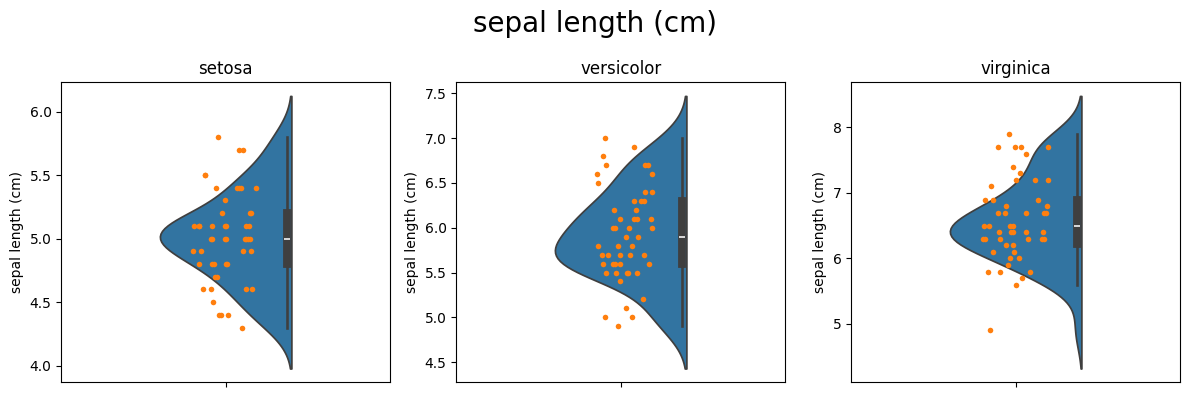

===== F-stats through all classes for sepal width (cm) =====

F-test = 49.160
Degree of freedom = 149
P-value = 4.492017133309115e-17

===== F-stats through class pairs for sepal width (cm) =====

=== F-stats through setosa and versicolor ===

F-test = 89.397
Degree of freedom = 99
P-value = 1.8452599454768703e-15

=== F-stats through setosa and virginica ===

F-test = 41.607
Degree of freedom = 99
P-value = 4.246355381844828e-09

=== F-stats through versicolor and virginica ===

F-test = 10.277
Degree of freedom = 99
P-value = 0.0018191004238894528



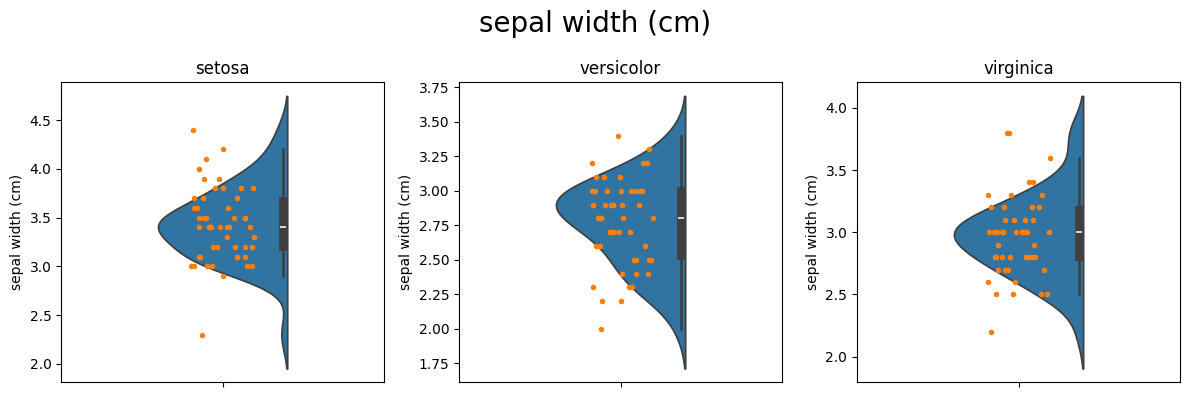

===== F-stats through all classes for petal length (cm) =====

F-test = 1180.161
Degree of freedom = 149
P-value = 2.8567766109619814e-91

===== F-stats through class pairs for petal length (cm) =====

=== F-stats through setosa and versicolor ===

F-test = 1559.675
Degree of freedom = 99
P-value = 5.40491051344156e-62

=== F-stats through setosa and virginica ===

F-test = 2498.619
Degree of freedom = 99
P-value = 1.5048006992425475e-71

=== F-stats through versicolor and virginica ===

F-test = 158.855
Degree of freedom = 99
P-value = 3.178819547806291e-22



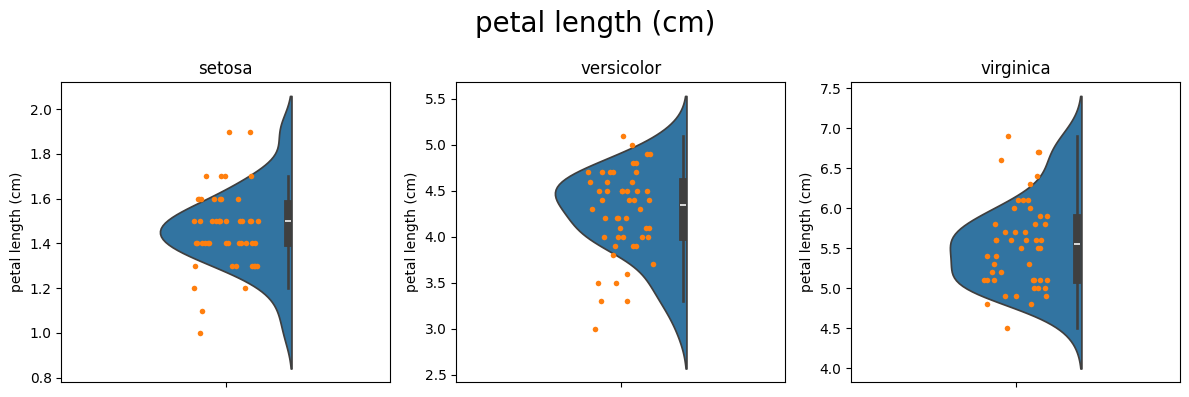

===== F-stats through all classes for petal width (cm) =====

F-test = 960.007
Degree of freedom = 149
P-value = 4.169445839443833e-85

===== F-stats through class pairs for petal width (cm) =====

=== F-stats through setosa and versicolor ===

F-test = 1161.470
Degree of freedom = 99
P-value = 3.8310953882493613e-56

=== F-stats through setosa and virginica ===

F-test = 1830.624
Degree of freedom = 99
P-value = 3.2303748184316355e-65

=== F-stats through versicolor and virginica ===

F-test = 213.901
Degree of freedom = 99
P-value = 2.2304090710249644e-26



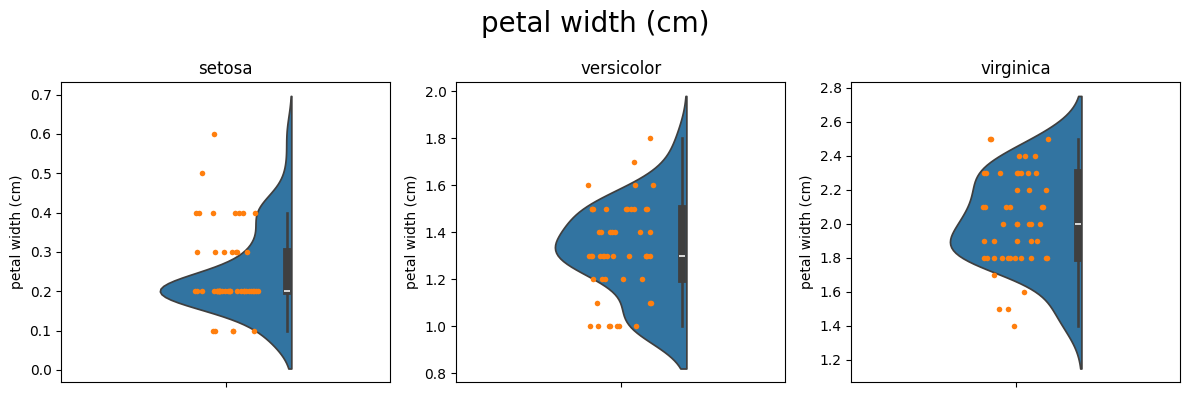

In [28]:
selected_columns = iris.feature_names
for col in selected_columns:
    calc_fs_and_visualize(df_total[col], df_total['target'])